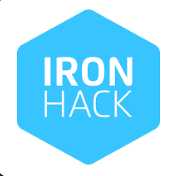

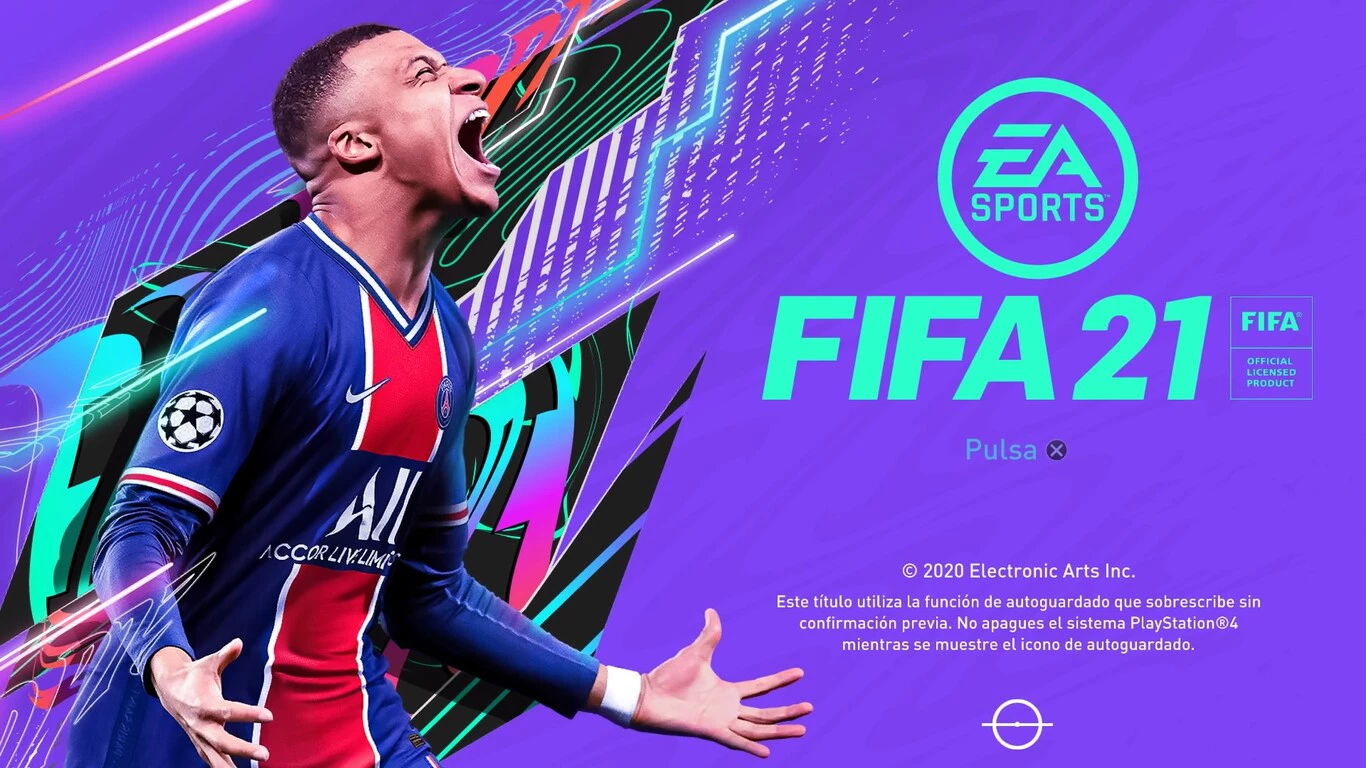

<h1 style="color:#6f4278;">Exploratory Data Analysis Test</h1>

Exploratory data analysis (EDA) is amongst the first steps of analyzing data. 
* It is usually done with descriptive statistics, where you'll summarize the statistical aspects of your dataset and start to unravel your insights. 
* Further on, I highly recommend using data visualization in this step.

<h2 style="color: #6f4278;">00 | Introducción de las librerias  </h2>

<div class="alert alert-block alert-info">
Tip # 1
Best practices; write all your libraries & functions at the beginning !
</div>

In [1]:
# pip install matplotlib
# pip install seaborn

In [2]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # funciones matemáticas

#❗New Libraries !
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import ttest_1samp

#👾# Machine Learning
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

In [3]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h2 style="color: #6f4278;">01 | Data Extraction</h2>

In [4]:
data = pd.read_csv('Fifa 23 Players Data.csv')

<h3 style="color: #6f4278;">Exploring the Data (First Impression)</h3>

In [5]:
data.head(3)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22


In [6]:
data.shape

(18539, 89)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

**First impression:**
    
_____________

The following dataset is a collection of **one-year** 18.539 player information distributed among 89 different columns. The majority of our data types are mostly **numericals** (71 integers / 18 objects).

Our **project goal** is to identify players who have the potential to become **the next "Mbappé"**. After reading the [documentation](https://www.kaggle.com/datasets/ekrembayar/fifa-21-complete-player-dataset?select=fifa21_male2.csv) we wil proceed with the following **strategy**:

1. The **target** of our dataset will be `Overall`, which is a summary of a player's performance and potential. 
2. Through **Exploratory Data Analysis** we will identify the features that contribute to this prediction.
_____________

<h3 style="color: #6f4278;">Estandarizando columnas</h3>

In [8]:
data.columns = [column.lower().replace(" ", "_") for column in data.columns]

In [9]:
data.columns

Index(['known_as', 'full_name', 'overall', 'potential', 'value(in_euro)',
       'positions_played', 'best_position', 'nationality', 'image_link', 'age',
       'height(in_cm)', 'weight(in_kg)', 'totalstats', 'basestats',
       'club_name', 'wage(in_euro)', 'release_clause', 'club_position',
       'contract_until', 'club_jersey_number', 'joined_on', 'on_loan',
       'preferred_foot', 'weak_foot_rating', 'skill_moves',
       'international_reputation', 'national_team_name',
       'national_team_image_link', 'national_team_position',
       'national_team_jersey_number', 'attacking_work_rate',
       'defensive_work_rate', 'pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_powe

In [10]:
df = data.copy()

<h2 style="color: #6f4278;">02 | Data Cleaning</h2>

In [11]:
df.head(1)

,known_as,full_name,overall,potential,value(in_euro),positions_played,best_position,nationality,image_link,age,height(in_cm),weight(in_kg),totalstats,basestats,club_name,wage(in_euro),release_clause,club_position,contract_until,club_jersey_number,joined_on,on_loan,preferred_foot,weak_foot_rating,skill_moves,international_reputation,national_team_name,national_team_image_link,national_team_position,national_team_jersey_number,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,st_rating,lw_rating,lf_rating,cf_rating,rf_rating,rw_rating,cam_rating,lm_rating,cm_rating,rm_rating,lwb_rating,cdm_rating,rwb_rating,lb_rating,cb_rating,rb_rating,gk_rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22


<h3 style="color: #6f4278;">Feature Selection (Dropping unnecesary features)</h3>

In [12]:
df.shape

(18539, 89)

_____________
From all features above, we will drop the following:
* `know_as`, `full_name`, `image_link`, `national_team_image` it's just the player identifier.
* `club_name`, `club_position`, `contract_until`, `club_jersey_number`, `joined_on`, `on_loan` these are specific to the player's current club situation and do not directly influence their potential or performance metrics.
* `national_team_name`, `national_team_position`, `national_team_jersey_number` are unnecessary details.
* `st_rating`, `lw_raating`, `cf_rating` are giving us to much detail of the player information, not needed if we are focusing on **overall score** and best position.
* Also, since we are looking for **field players** we can drop some goalkeeper-specific features like `goalkeeper_diving`, `goalkeeper_handling`, `_goalkeeperkicking`, `goalkeeper_positioning` and `goalkeeper_reflexes`
* Aggregated stats like `totalstats` and `basestats` are the sum of different stats. Same with `crossing`, `finishing`, etc., are the sum of `attacking`
    * Attacking = crossing, finishing, heading_accuracy, short_passing, volleys
    * Skill = dribbling, curve, fk_accuracy, long_passing, ball_control
    * Movement = acceleration, sprint_speed, agility, reactions, balance
    * Power = shot_power, jumping, stamina, strength, long_shots
    * Mentality = aggression, interceptions, positioning, vision, penalties, composure
    * Defending = marking, standing_tackle, sliding_tackle
_____________

In [13]:
df = df.drop(columns=['known_as', 'full_name', 'image_link', 'national_team_image_link',
                      'club_name', 'club_position', 'contract_until', 'club_jersey_number',
                      'joined_on', 'on_loan', 'national_team_name', 'national_team_position',
                      'national_team_jersey_number', 'st_rating', 'lw_rating', 'cf_rating',
                      'rf_rating', 'rw_rating', 'cam_rating', 'lm_rating', 'cm_rating',
                      'rm_rating', 'lwb_rating', 'cdm_rating', 'rwb_rating', 'lb_rating',
                      'cb_rating', 'rb_rating', 'gk_rating',
                      'goalkeeper_diving', 'goalkeeper_handling', '_goalkeeperkicking',
                      'goalkeeper_positioning', 'goalkeeper_reflexes', 'totalstats',
                      'basestats', 'crossing', 'finishing', 'volleys', 'dribbling', 
                      'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol', 
                      'acceleration', 'sprint_speed', 'agility', 'reactions', 
                      'balance', 'shot_power', 'jumping', 'stamina', 'strength', 
                      'long_shots', 'aggression', 'interceptions', 'positioning', 
                      'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 
                      'sliding_tackle', 'positions_played'])

In [14]:
df.columns

Index(['overall', 'potential', 'value(in_euro)', 'best_position',
       'nationality', 'age', 'height(in_cm)', 'weight(in_kg)', 'wage(in_euro)',
       'release_clause', 'preferred_foot', 'weak_foot_rating', 'skill_moves',
       'international_reputation', 'attacking_work_rate',
       'defensive_work_rate', 'pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total',
       'heading_accuracy', 'short_passing', 'lf_rating'],
      dtype='object')

In [15]:
df.shape

(18539, 25)

<h3 style="color: #6f4278;">Checking Null Values</h3>

In [16]:
df.isnull().sum()

overall                     0
potential                   0
value(in_euro)              0
best_position               0
nationality                 0
age                         0
height(in_cm)               0
weight(in_kg)               0
wage(in_euro)               0
release_clause              0
preferred_foot              0
weak_foot_rating            0
skill_moves                 0
international_reputation    0
attacking_work_rate         0
defensive_work_rate         0
pace_total                  0
shooting_total              0
passing_total               0
dribbling_total             0
defending_total             0
physicality_total           0
heading_accuracy            0
short_passing               0
lf_rating                   0
dtype: int64

<h3 style="color: #6f4278;">Checking Duplicates</h3>

In [17]:
duplicates = df.duplicated().sum()

In [18]:
n_duplicates_percentage = round((duplicates / len(df)) * 100, 2)
print(f"Percentage of duplicates: {n_duplicates_percentage}%")

Percentage of duplicates: 0.64%


In [19]:
df = df.drop_duplicates()

<h3 style="color: #6f4278;">Checking Emtpy Spaces</h3>

In [20]:
df.eq(" ").sum()

overall                     0
potential                   0
value(in_euro)              0
best_position               0
nationality                 0
age                         0
height(in_cm)               0
weight(in_kg)               0
wage(in_euro)               0
release_clause              0
preferred_foot              0
weak_foot_rating            0
skill_moves                 0
international_reputation    0
attacking_work_rate         0
defensive_work_rate         0
pace_total                  0
shooting_total              0
passing_total               0
dribbling_total             0
defending_total             0
physicality_total           0
heading_accuracy            0
short_passing               0
lf_rating                   0
dtype: int64

<h3 style="color: #6f4278;">Moving our target to the right</h3>

In [21]:
df.columns

Index(['overall', 'potential', 'value(in_euro)', 'best_position',
       'nationality', 'age', 'height(in_cm)', 'weight(in_kg)', 'wage(in_euro)',
       'release_clause', 'preferred_foot', 'weak_foot_rating', 'skill_moves',
       'international_reputation', 'attacking_work_rate',
       'defensive_work_rate', 'pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total',
       'heading_accuracy', 'short_passing', 'lf_rating'],
      dtype='object')

<div class="alert alert-block alert-info">
Tip # 2
How to move your target to the right
</div>

[stackoverflow](https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe)

### Método Toño

In [22]:
target = df.pop("overall") # extrayendo columna
df["overall"] = target # devolviendo la columna

In [23]:
df

,potential,value(in_euro),best_position,nationality,age,height(in_cm),weight(in_kg),wage(in_euro),release_clause,preferred_foot,weak_foot_rating,skill_moves,international_reputation,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,heading_accuracy,short_passing,lf_rating,overall
0,91,54000000,CAM,Argentina,35,169,67,195000,99900000,Left,4,4,5,Low,Low,81,89,90,94,34,64,70,91,91,91
1,91,64000000,CF,France,34,185,81,450000,131199999,Right,4,4,4,Medium,Medium,80,88,83,87,39,78,90,89,89,91
2,91,84000000,ST,Poland,33,185,81,420000,172200000,Right,4,4,5,High,Medium,75,91,79,86,44,83,91,84,88,91
3,91,107500000,CM,Belgium,31,181,70,350000,198900000,Right,5,4,4,High,High,74,88,93,87,64,77,55,93,87,91
4,95,190500000,ST,France,23,182,73,230000,366700000,Right,4,5,4,High,Low,97,89,80,92,36,76,72,85,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,56,110000,CAM,Republic of Ireland,21,174,68,500,193000,Right,3,2,1,Medium,Medium,68,48,43,51,31,33,30,42,50,47
18535,57,90000,CDM,China PR,17,175,60,500,158000,Right,3,2,1,Medium,Medium,55,37,41,47,48,39,44,46,43,47
18536,67,130000,RM,Northern Ireland,18,170,65,500,332000,Right,3,2,1,High,Medium,64,40,49,52,37,35,42,54,49,47
18537,61,100000,CB,Republic of Ireland,17,178,65,500,218000,Right,3,2,1,Medium,Medium,52,24,25,32,52,41,41,25,30,47


<h2 style="color: #6f4278;">03 | EDA (Exploratory Data Analysis)</h2>

<h3 style="color: #6f4278;">Statistical information about the numerical columns</h3>

In [24]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
potential,18420.0,70.96,6.17,48.0,67.0,71.0,75.0,95.0
value(in_euro),18420.0,2842697.01,7645259.88,0.0,475000.0,975000.0,2000000.0,190500000.0
age,18420.0,25.24,4.73,16.0,21.0,25.0,29.0,44.0
height(in_cm),18420.0,181.55,6.86,155.0,177.0,182.0,186.0,206.0
weight(in_kg),18420.0,75.17,7.01,49.0,70.0,75.0,80.0,105.0
wage(in_euro),18420.0,8733.10,19452.42,0.0,1000.0,3000.0,7000.0,450000.0
release_clause,18420.0,5015212.32,14686054.50,0.0,660000.0,1500000.0,3300000.0,366700000.0
weak_foot_rating,18420.0,2.94,0.67,1.0,3.0,3.0,3.0,5.0
skill_moves,18420.0,2.36,0.77,1.0,2.0,2.0,3.0,5.0
international_reputation,18420.0,1.09,0.36,1.0,1.0,1.0,1.0,5.0


<div class="alert alert-block alert-info">
Tip # 3

How to interpret basic statistics</div>

- **Measures of central tendency**: Mean, median, mode
- **Measures of spread / dispersion**: SD, var, range, quartiles, percentiles
- **Meaures of frequency** Frequency

### ¿Qué conclusiones sacamos de `.describe()`?

**3 conclusiones**

**Primera conclusión:** Si nuestro objetivo es encontrar a la futura celebridad del mundo tendremos que encontrar un jugador que a nivel técnico supere con creces el percentil 75% (más de 70 en la sección de overall) pero a su vez sea claramente más jóven, lo que significaría jugadores menores de 21 años.

**Segunda Conclusión:** A nivel financiero esta gráfica nos enseña cual podría ser el precio de dicho jugador. Pues si buscamos a un jugardor por encima del percentil 75 los costes al menos serán de 2mll. y sin poder alcanzar los 190 mll. Lo mismo se aplicaría al aspecto de salario o a la clausula.

**Tercera Conclusión:** el aspecto físico es menos importante porque la calidad del jugador no pedende de ello, pero si que podemos llegar a interesantes conclusiones como que si el jugador es más bajito que la media tendrá problemas para ser un rematador de cabeza o si es pesado que los demás podrá tener una mayor presencia a la hora del uno contra uno.

+ **Range:** defines the difference between the highest and lowest values.
+ **Variance**: measures how far each number in the set is from the mean and thus from every other number in the set.
+ **Standard deviation:** The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance
+ **Quartiles:** A quartile is a statistical term that describes a division of observations into four defined intervals based on the values of the data and how they compare to the entire set of observations.
+ **Percentiles:** same but divided in 100 groups.

![quartiles](https://www.onlinemathlearning.com/image-files/median-quartiles.png)

### Exercise 1: Qué es el [Inter Quartile Range](https://medium.com/@vinitasilaparasetty/quartiles-for-beginners-in-data-science-2ca5a640b07b)? Qué conclusiones podemos sacar en describe?

-El "[Inter](https://es.wikipedia.org/wiki/Inter_de_Mil%C3%A1n) Quartiles Range" nos ayuda a entender la distribución de la tabla, siendo la mediana (el elemento central de la muestra) el punto de referencia o dicho de otra forma el 50% y desde la cual obtendremos el 25% de la muestra inferior y superior. Aplicado a este mundo futbolítico nos ayudaría a ver cual es el perfil de cada jugador, si se encuentra por encima de la mediana (es decir que será más fácil que ese jugador se encuentre con jugadores de peor calidad que el) o no.

<h32 style="color: #6f4278;">Selecting numerical</h3>

In [25]:
num = df.select_dtypes("number")

<h3 style="color: #6f4278;">Checking Distributions</h3>

#### Using maptplotlib ---> ALWAYS check [documentation](https://matplotlib.org/) !

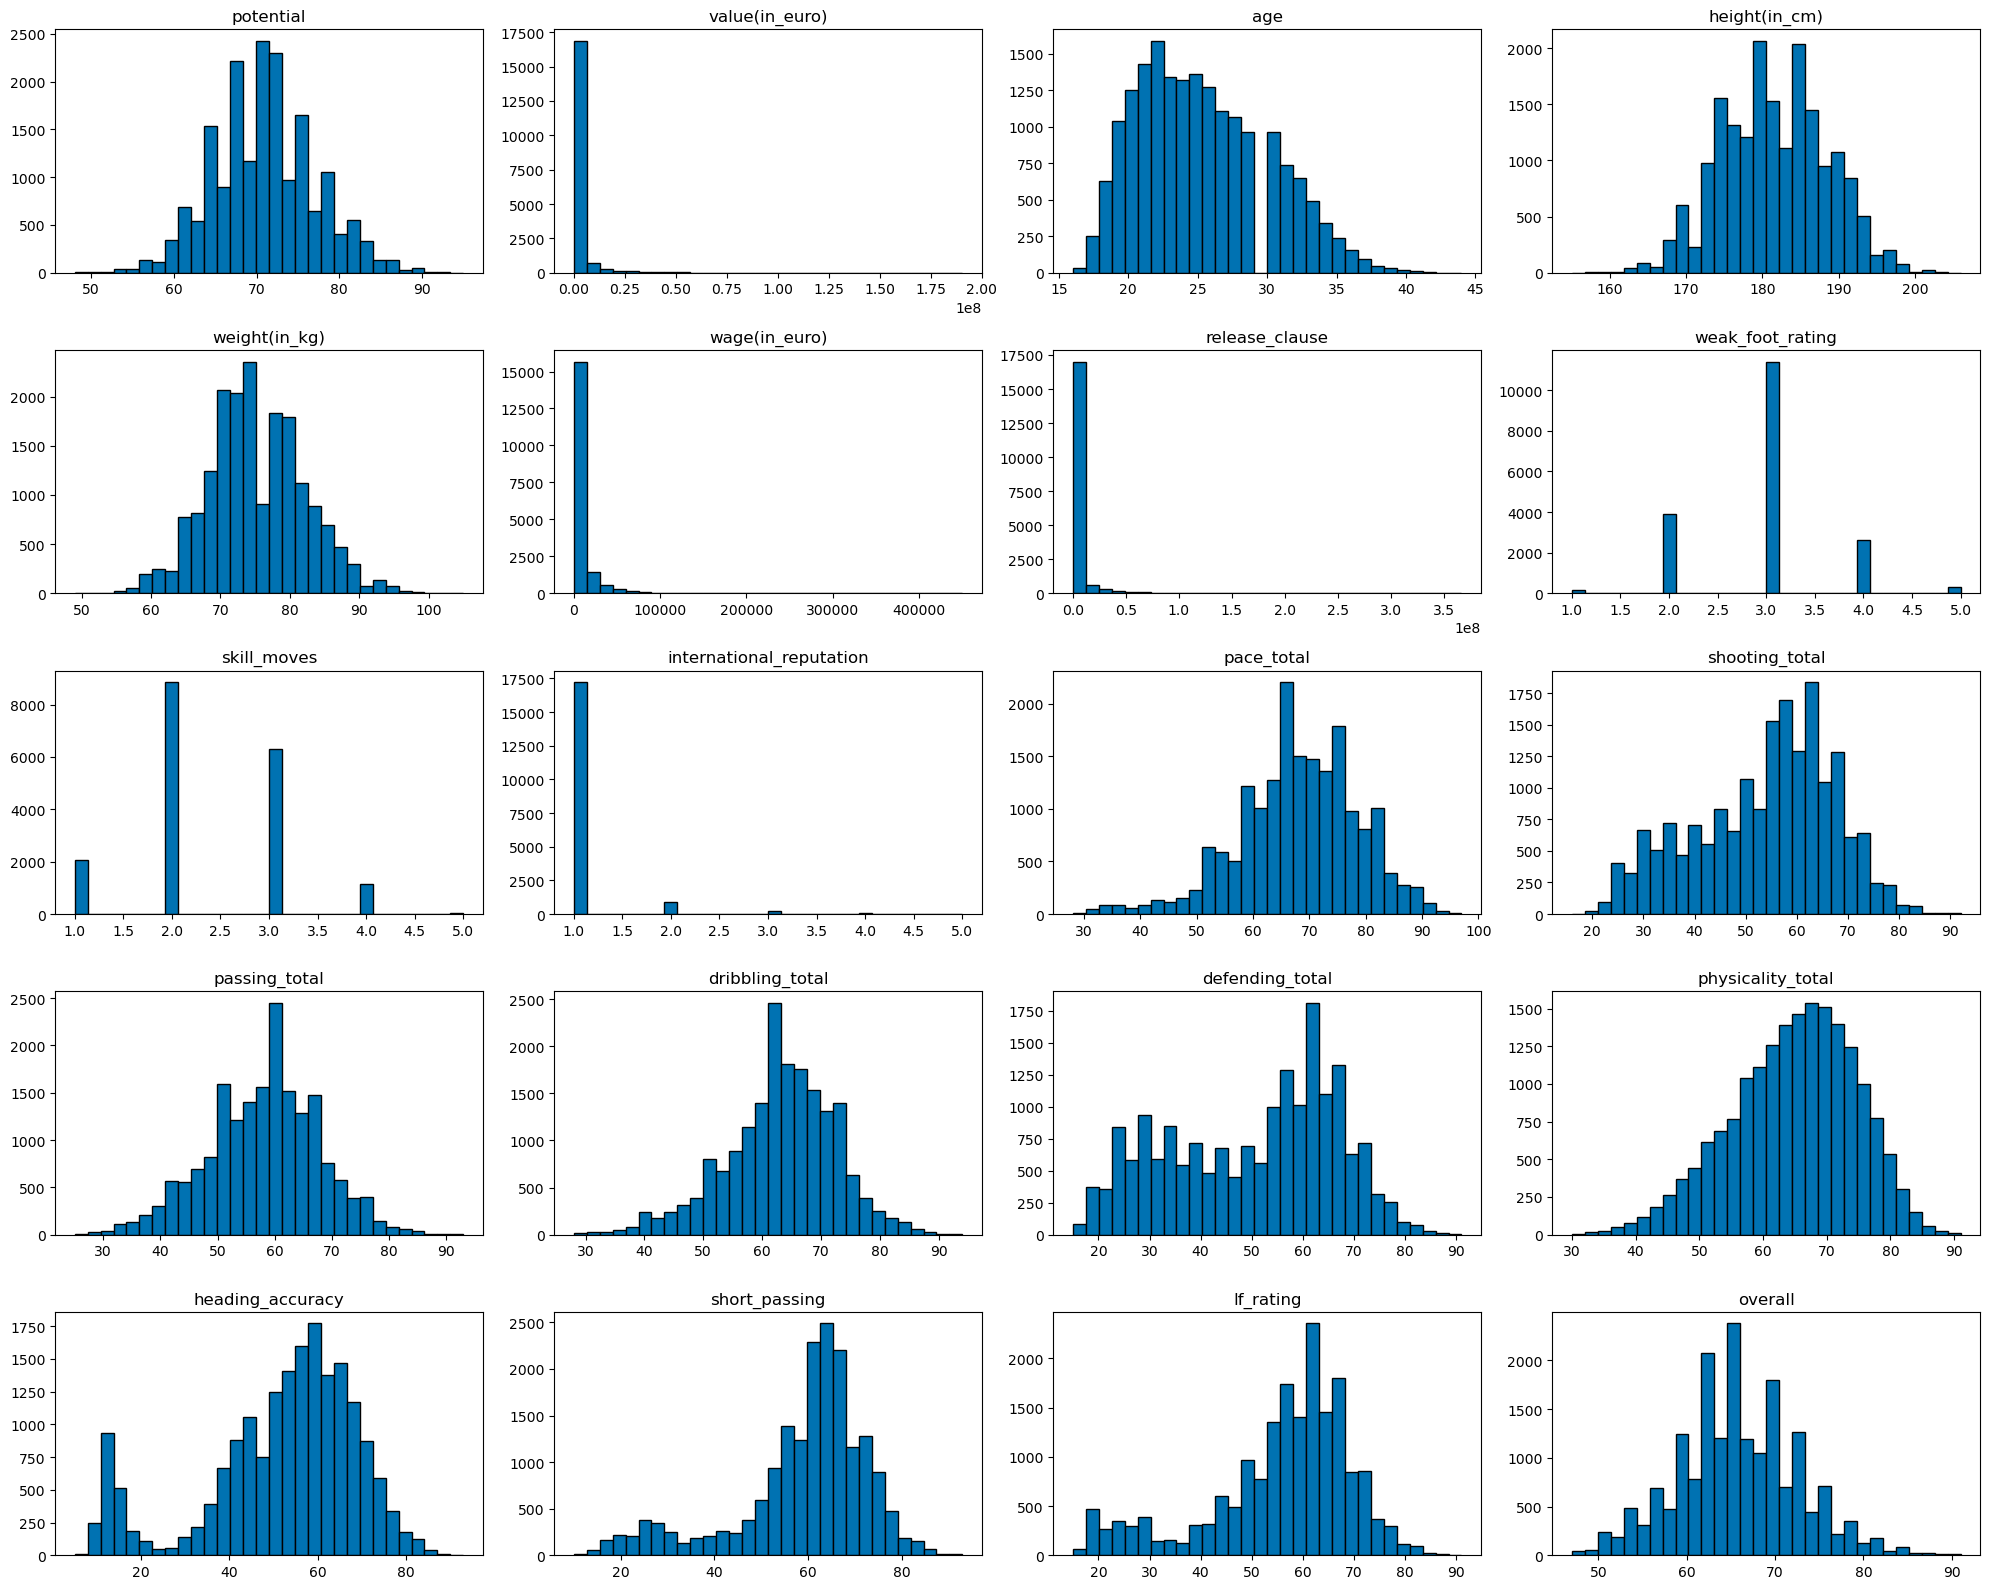

In [26]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

### Exercise 2: ¿Cómo interpretamos estos histogramas?

-Con estos histogramas podemos analizar cuales son los aspectos más importantes que tiene que tener un jugador y cómo podríamos clasificar a los jugadores en general.

-Otra interpretación que encontramos en la misma es que hay categorías que están más relacionadas (en teoría) con ciertas posiciones de juego, como puede ser defending_total y posiciones de defensa, centrocampista y portero. Esto se muestra a su vez en que haya una gran cola hacia la izquierda en dicha tabla. Por lo que desde este punto podríamos lanzar hipótesis sobre el perfil de cada jugador según la posición que juega.
.

-Además vemos histogramas que debería de ser sustituidos por otros gráficos, ya que a pesar de tener números no son numéricas sino categóricas (Skill_moves o International_reputation).

### Exercise 3: ¿Qué podríamos hacer con estas distribuciones?

-Para los casos en los que busquemos conseguir grandes jugadores y seamos una academia de fútbol deberemos trabajar duramente el aspecto físico (que es muy alto en general) y buscar aspectos donde la media de los jugadores sea más baja para intentar destacar, ya sea defensa, pases o golpes de cabeza.

-Como ya se ha mencionado anteriormente, con estas se pueden hacer hipótesis sobre los perfiles de cada posición de juego o el perfil del contrincante medio.

<h3 style="color: #6f4278;">Checking Outliers (continous numbers)</h3>

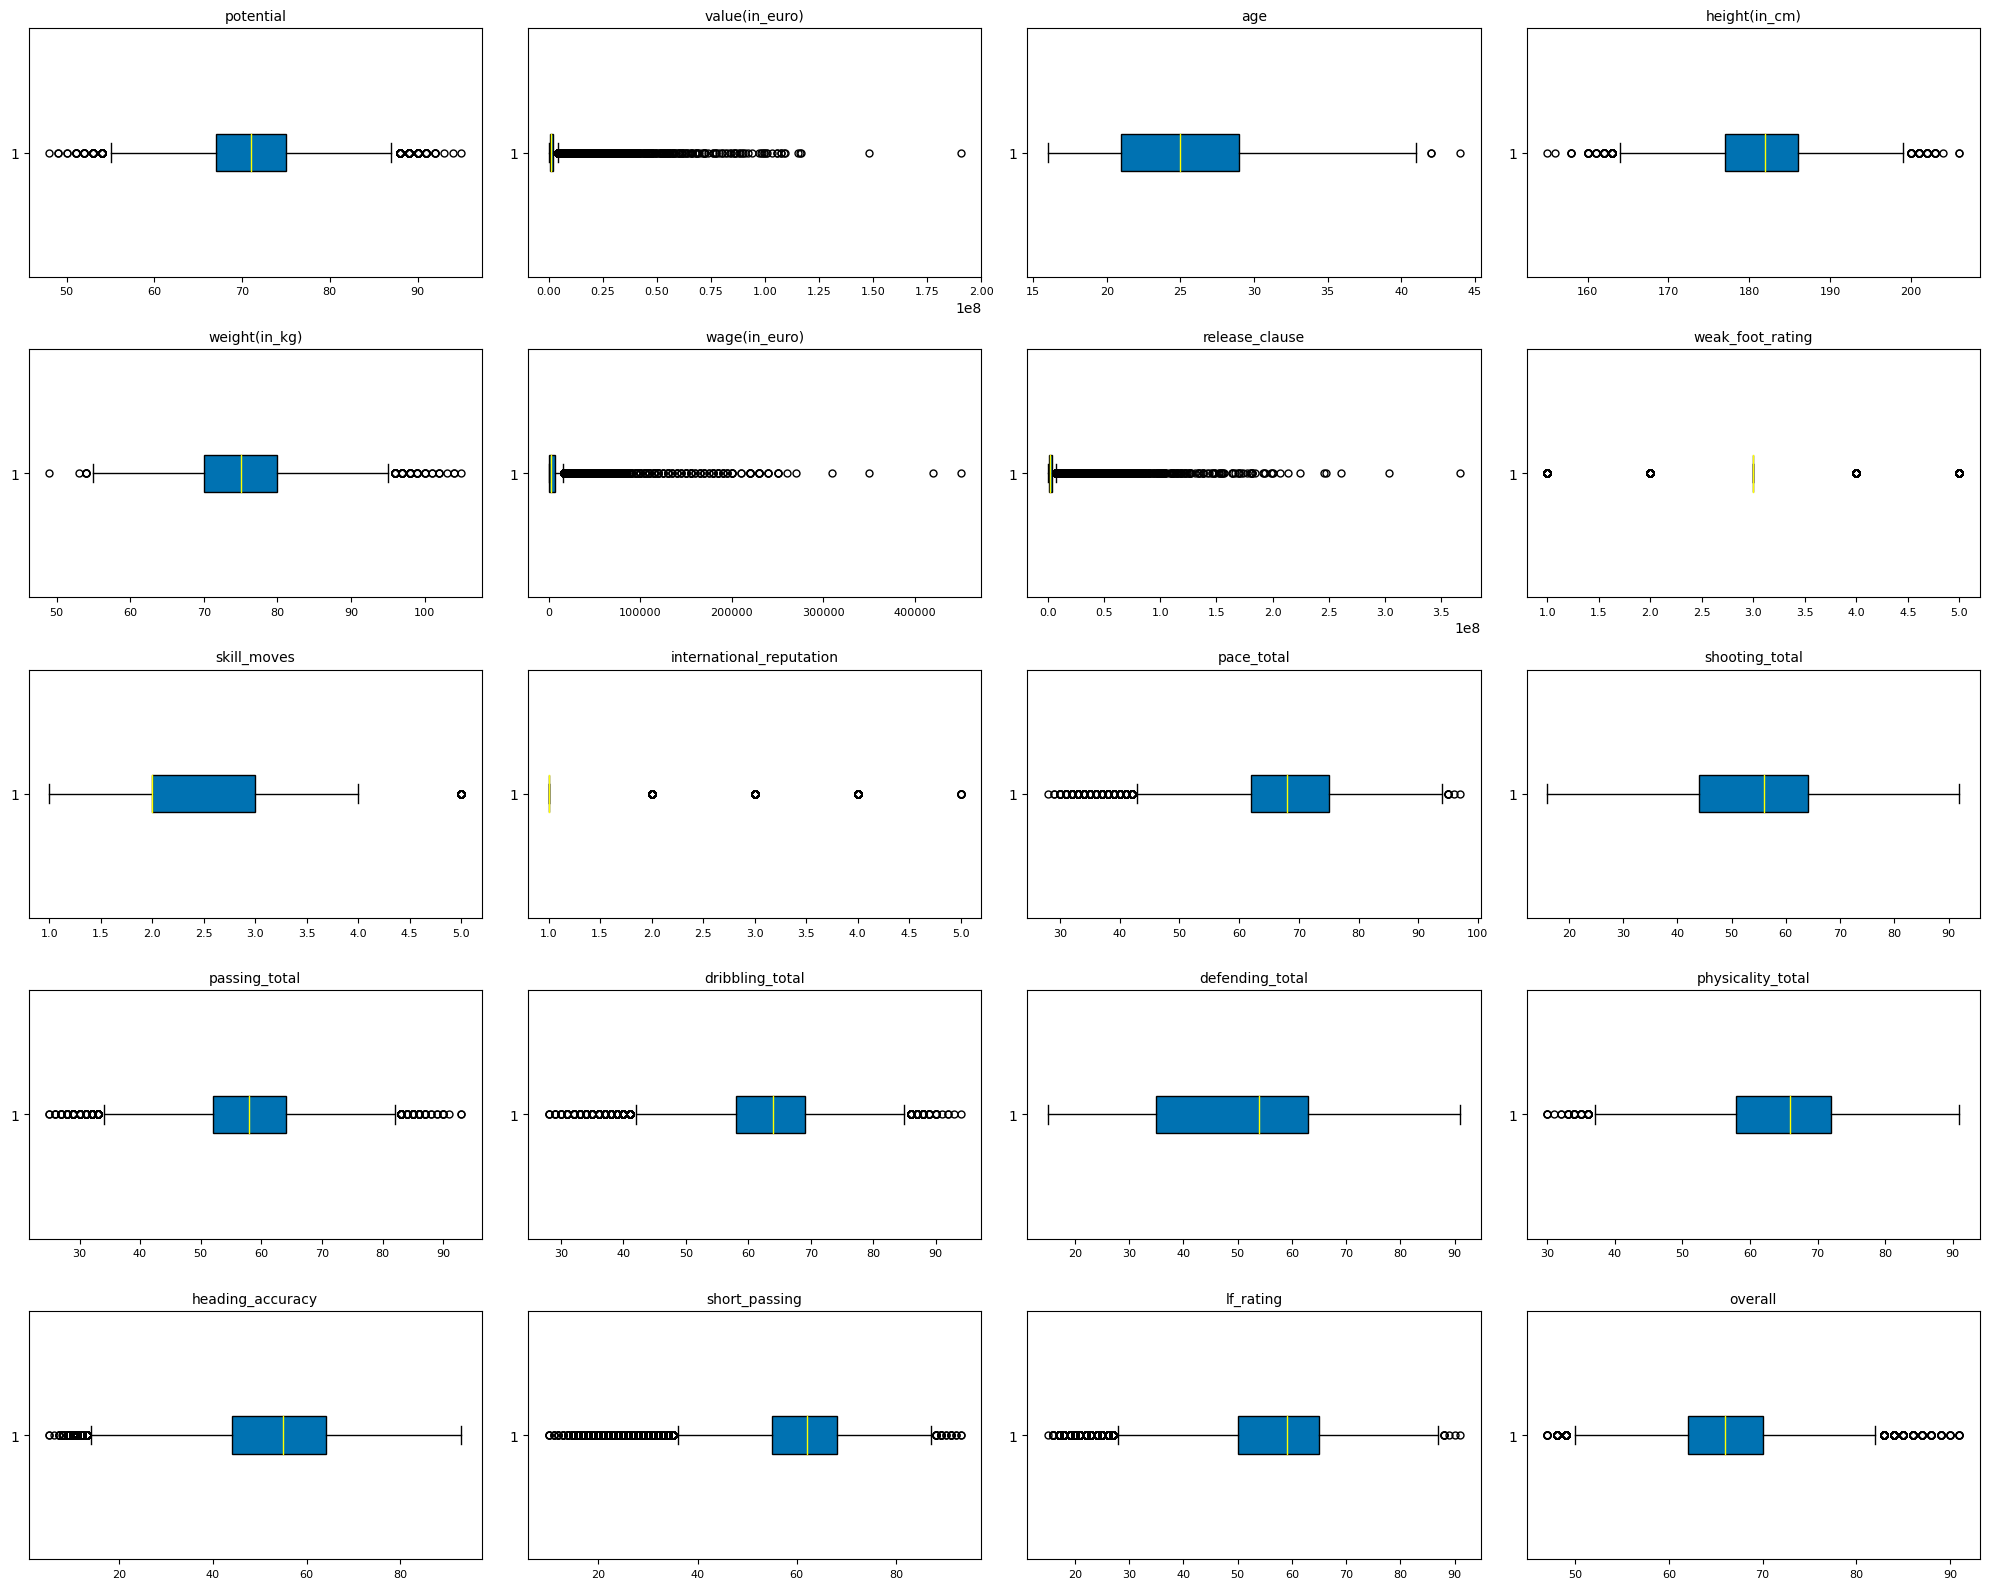

In [27]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

<h3 style="color: #6f4278;">Checking Outliers (discrete numbers)</h3>

In [28]:
boxplot = num[['value(in_euro)', 'wage(in_euro)', 'release_clause', 'dribbling_total', 'short_passing', 'lf_rating']]

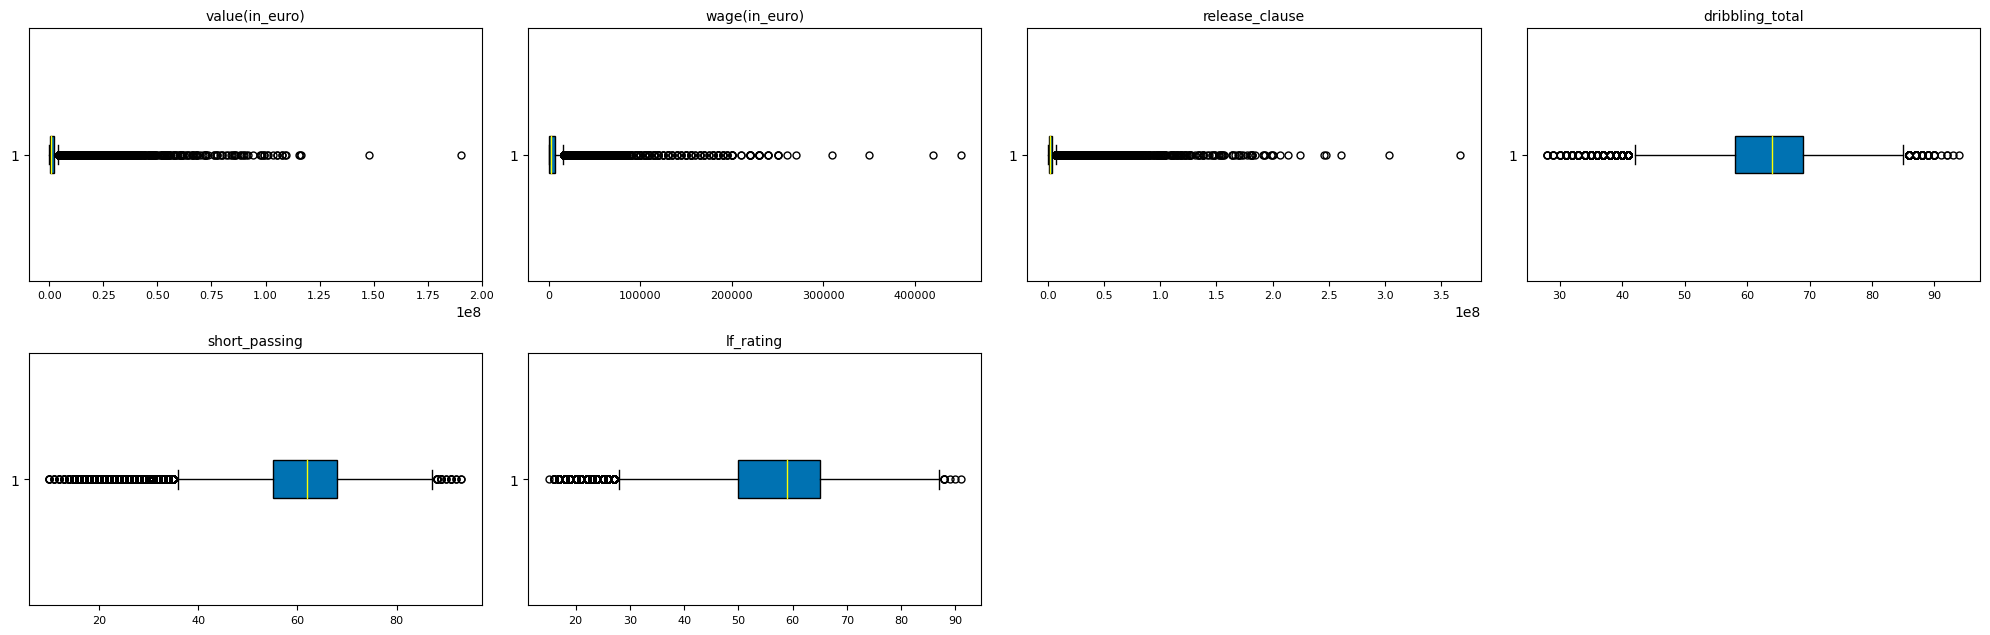

In [29]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(boxplot.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(boxplot.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(boxplot.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)  # Adjust x-axis ticks

plt.tight_layout()
plt.show()

### Qué conclusiones sacarías de los box-plots?

Que es muy difícil [destacar](https://www.youtube.com/watch?v=oFZzhImkeEM). Los cuatiles en muchos historiogramas nos demuestra que ser mejor que los demás es muy complicado cuando se llega a los niveles de la élite. Pero que ser destacado en algún aspecto va acompañado de una gran recompensa económica.

<h3 style="color: #6f4278;">Looking for Correlations</h3>

In [30]:
num_corr = round(num.corr(), 2) # estandard es Pearson

<div class="alert alert-block alert-info">
Tip # 4
    
We don't want multicolinearity --> correlation between features biases the model...
    
We want high correlations (+ or -) with the target --> valuable information for the predictions</div>

#### Checking correlations with [Seaborn](https://seaborn.pydata.org/index.html)

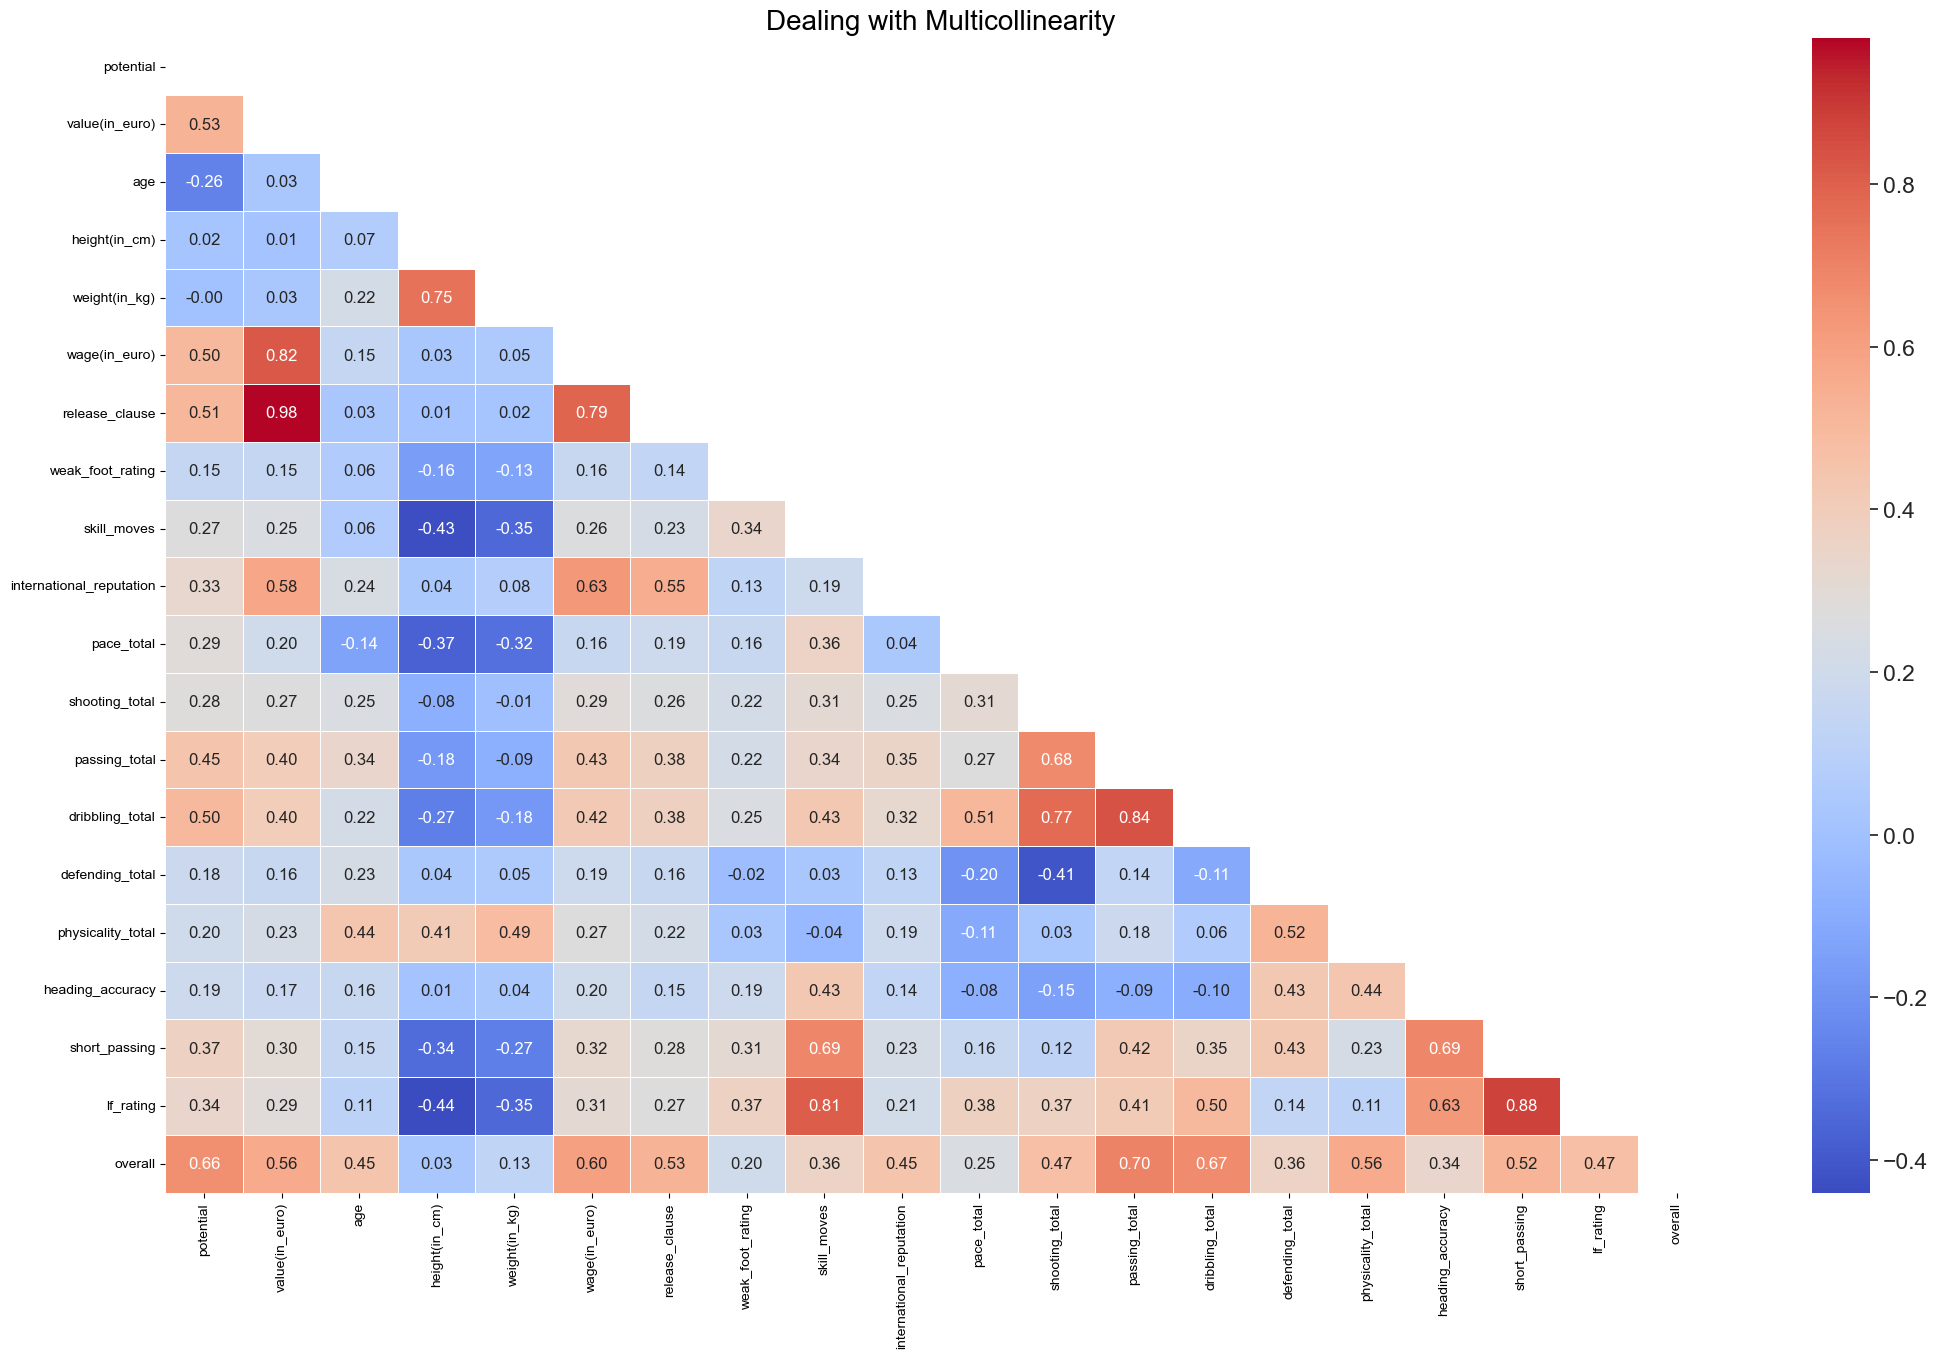

In [31]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

### Exercise 4: Cómo interpretaríamos la matriz? Qué otras técnicas de correlación conocemos?

-Los Heatmap nos ayudan mostrándonos la correlación entre las columnas por lo que podemos entender que elementos son más vinculantes entre si mismos y cuales no. Traladado a este ejemplo, si tuvieramos que buscar un jugador eligiendo dos características podría ser interesante escoger a un jugador con una gran passing_total, que es la categoría más importante de todas, y potential, que es la tercera. Y ¿Por qué escoger la tercera categoría más importante en vez de la segunda? Porque la segunda está muy vinculada con la primera y si escogemos a un jugador con un buen pase será muy probable que sea un buen diblador y por consiguiente será oportuno centrarnos en que tenga un gran potencial.

-Además nos ayuda con un simple vistazo nos confirma ideas que teníamos al principio de que la altura el peso o el pie del jugador no es tan importante.

-Según las características que queramos correlacionar tendremos unas herramientas u otras. Si los datos son categóricos podremos usar Chi_value y si son numéricos podremos usar Personr o Spearman.


### Correlaciones específicas con el target

Como los datos que se presentan a pesar de ser numéricos son tanto categóricas como numéricas, creo que sería interesante dividir la tabla entre dichos elementos.

En primer lugar vamos a trabajar con los elementos categóricos (ordinal) y para el cual aplicaremos el sistema de **Chi-cuadrado**

In [32]:
numcat=num[['international_reputation','weak_foot_rating', 'skill_moves']].corr()

from scipy.stats import chi2_contingency
estadístico_de_prueba_Chi_cuadrado, p_value, grado_de_libertad, _ = chi2_contingency(numcat)
p_value

0.6096324344804717

El resultado es muy alto. lo cual nos indica que no hay relación... **He leido que en vez de correlación puede haber causalidad*¿Esto rompería el modelo? Tendría sentido que la causa de dos elementos dieran como resultado a la reputación**

Para los elementos cuantitativos (discretos), nos es posible aplicar el sistema anterior, por lo que recurriremos al sistema de **Spearman**. La aplicación de este sistema se debe a que son elementos ordinales. Y como este sistema solo persmite dos variables, revisalemos la correlación entre el Overall y la edad, y el suelo

In [33]:
from scipy.stats import spearmanr

In [34]:
numnum=num[['potential', 'value(in_euro)', 'age', 'height(in_cm)', 'weight(in_kg)','wage(in_euro)', 'release_clause', 'pace_total', 'shooting_total','passing_total', 'dribbling_total', 'defending_total','physicality_total', 'heading_accuracy', 'short_passing', 'lf_rating','overall']]

In [35]:
correlation_coefficient, p_value = spearmanr(numnum['overall'], numnum['value(in_euro)'])
p_value

0.0

In [36]:
correlation_coefficient, p_value = spearmanr(numnum['overall'], numnum['age'])
p_value

0.0

In [37]:
num

,potential,value(in_euro),age,height(in_cm),weight(in_kg),wage(in_euro),release_clause,weak_foot_rating,skill_moves,international_reputation,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,heading_accuracy,short_passing,lf_rating,overall
0,91,54000000,35,169,67,195000,99900000,4,4,5,81,89,90,94,34,64,70,91,91,91
1,91,64000000,34,185,81,450000,131199999,4,4,4,80,88,83,87,39,78,90,89,89,91
2,91,84000000,33,185,81,420000,172200000,4,4,5,75,91,79,86,44,83,91,84,88,91
3,91,107500000,31,181,70,350000,198900000,5,4,4,74,88,93,87,64,77,55,93,87,91
4,95,190500000,23,182,73,230000,366700000,4,5,4,97,89,80,92,36,76,72,85,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,56,110000,21,174,68,500,193000,3,2,1,68,48,43,51,31,33,30,42,50,47
18535,57,90000,17,175,60,500,158000,3,2,1,55,37,41,47,48,39,44,46,43,47
18536,67,130000,18,170,65,500,332000,3,2,1,64,40,49,52,37,35,42,54,49,47
18537,61,100000,17,178,65,500,218000,3,2,1,52,24,25,32,52,41,41,25,30,47


### Fórmula la hipótesis nula y 3 test estadísticos

Mis Hipótesis nulas dicen así:

       
    -Y contra mayor edad, el salario es mejor. Salario para cuantil 95= 37000
        
Estos cuantiles los hemos hallado aplicando la siguiente fórmula: q95=num['wage(in_euro)'].quantile(0.95)

In [38]:
ttest_1samp(num['wage(in_euro)'], 37000)
_, p_value = ttest_1samp(num['wage(in_euro)'], 37000)
alpha = 0.05
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis")

We reject the null hypotesis


**Aplicamos Cramer´s**. Para una hipótesis que nos demuestre la relación entre el potencial.

In [39]:
chi2, p_value, dof, expected = ss.chi2_contingency(num['potential'])
n = num['potential'].sum()
coeficiente_cramer = np.sqrt(chi2 / (n * (min(num['potential'].shape) - 1)))

print("Coeficiente de Cramer:", coeficiente_cramer)

Coeficiente de Cramer: 0.0


### Realiza 3 plots y explica los hallazgos de los datos

<Axes: xlabel='value(in_euro)'>

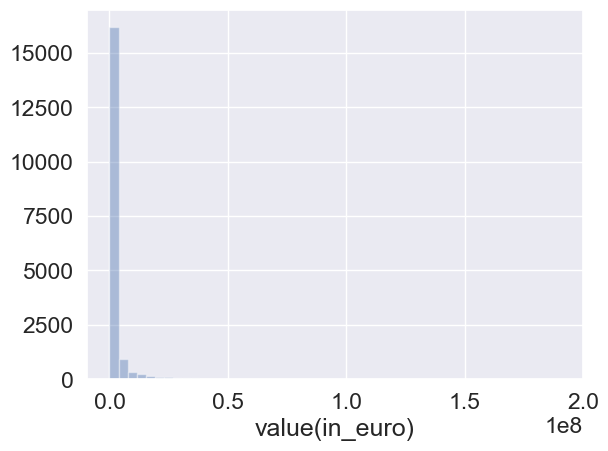

In [40]:
sns.distplot( a=df["value(in_euro)"], hist=True, kde=False, rug=False )

<Axes: xlabel='value(in_euro)', ylabel='age'>

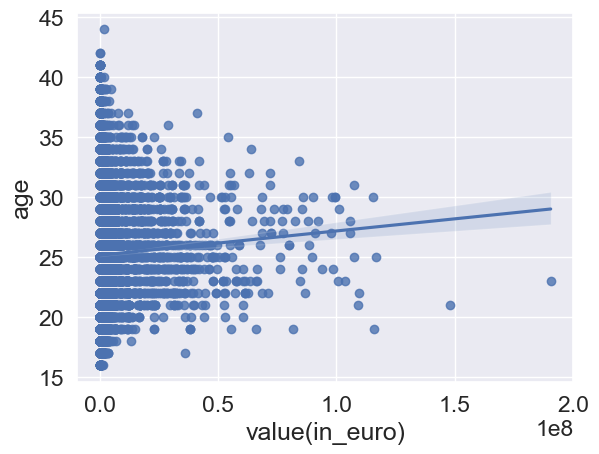

In [41]:
sns.regplot(x=df["value(in_euro)"], y=df["age"])

<Axes: xlabel='value(in_euro)', ylabel='international_reputation'>

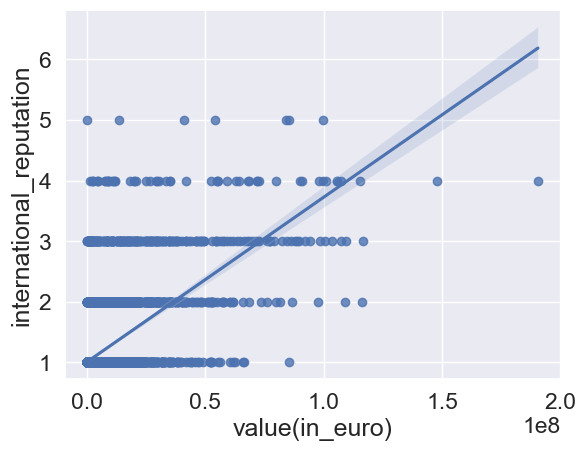

In [42]:
sns.regplot(x=df["value(in_euro)"], y=df["international_reputation"])

# Data Science

<h1 style="color: #00BFFF;">04 | Data Processing</h1>

<h2 style="color: #008080;">Normalizing the Data</h2>

In [43]:
columnas = ['attacking_work_rate','attacking_work_rate','defensive_work_rate','defensive_work_rate','preferred_foot','nationality','best_position']
columnas_a_eliminar = ["passing_total","dribbling_total",'overall']
df=df.drop(columnas, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18420 entries, 0 to 18538
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   potential                 18420 non-null  int64
 1   value(in_euro)            18420 non-null  int64
 2   age                       18420 non-null  int64
 3   height(in_cm)             18420 non-null  int64
 4   weight(in_kg)             18420 non-null  int64
 5   wage(in_euro)             18420 non-null  int64
 6   release_clause            18420 non-null  int64
 7   weak_foot_rating          18420 non-null  int64
 8   skill_moves               18420 non-null  int64
 9   international_reputation  18420 non-null  int64
 10  pace_total                18420 non-null  int64
 11  shooting_total            18420 non-null  int64
 12  passing_total             18420 non-null  int64
 13  dribbling_total           18420 non-null  int64
 14  defending_total           18420 non-null  i

In [44]:
#Normalizamos las columnas
X = df.drop(columnas_a_eliminar, axis=1)
y = df["overall"]
minimos = df.min()
maximos = df.max()
df = (df - minimos) / (maximos - minimos)

<h2 style="color: #008080;">X-Y Split</h2>

In [45]:
#Eliminamos los outlier
def outlier_slayer(data): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

outlier_slayer(df)

,potential,value(in_euro),age,height(in_cm),weight(in_kg),wage(in_euro),release_clause,weak_foot_rating,skill_moves,international_reputation,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,heading_accuracy,short_passing,lf_rating,overall
1188,0.595745,0.000000,0.464286,0.431373,0.607143,0.000000,0.000000,0.5,0.50,0.0,0.710145,0.763158,0.573529,0.696970,0.302632,0.852459,0.829545,0.722892,0.776316,0.659091
1401,0.595745,0.000000,0.642857,0.607843,0.464286,0.000000,0.000000,0.5,0.25,0.0,0.391304,0.434211,0.573529,0.500000,0.815789,0.672131,0.875000,0.759036,0.565789,0.659091
1576,0.617021,0.000000,0.285714,0.372549,0.178571,0.000000,0.000000,0.5,0.50,0.0,0.913043,0.736842,0.573529,0.757576,0.210526,0.377049,0.431818,0.710843,0.776316,0.636364
1657,0.574468,0.000000,0.392857,0.411765,0.428571,0.000000,0.000000,0.5,0.50,0.0,0.797101,0.671053,0.661765,0.712121,0.710526,0.721311,0.670455,0.759036,0.750000,0.636364
1733,0.574468,0.007874,0.678571,0.450980,0.446429,0.001444,0.008999,0.5,0.25,0.0,0.507246,0.473684,0.426471,0.439394,0.815789,0.721311,0.863636,0.602410,0.526316,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18006,0.425532,0.001102,0.035714,0.549020,0.375000,0.001222,0.001445,0.5,0.25,0.0,0.449275,0.355263,0.411765,0.363636,0.421053,0.393443,0.500000,0.602410,0.486842,0.136364
18008,0.531915,0.001312,0.071429,0.490196,0.375000,0.001111,0.001876,0.5,0.25,0.0,0.550725,0.315789,0.352941,0.303030,0.460526,0.409836,0.556818,0.530120,0.447368,0.136364
18009,0.404255,0.001102,0.035714,0.490196,0.428571,0.001111,0.001361,0.5,0.25,0.0,0.579710,0.394737,0.397059,0.409091,0.421053,0.409836,0.397727,0.542169,0.486842,0.136364
18014,0.531915,0.001312,0.000000,0.450980,0.375000,0.001111,0.002149,0.5,0.25,0.0,0.550725,0.381579,0.441176,0.454545,0.302632,0.327869,0.465909,0.626506,0.513158,0.136364


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'100% of our data: {len(df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 18420.
80% for training data: 12894.
20% for test data: 5526.


<h1 style="color: #6f4278;">05 | Modeling</h1>

<h2 style="color: #6f4278;">Train-Test Split</h2>

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<h2 style="color: #6f4278;">Model Validation</h2>

In [48]:
predictions = model.predict(X_test)
print(f'20% for test prediction data: {len(predictions)}.')

20% for test prediction data: 5526.


In [49]:
r2_lr = r2_score(y_test, predictions)
RMSE_lr = root_mean_squared_error(y_test, predictions)
MSE_lr = mean_squared_error(y_test, predictions)
MAE_lr = mean_absolute_error(y_test, predictions)

print("R2 = ", round(r2_lr, 4))
print("RMSE = ", round(RMSE_lr, 4))
print("The value of the metric MSE is ", round(MSE_lr, 4))
print("MAE = ", round(MAE_lr, 4))

R2 =  0.9096
RMSE =  2.0256
The value of the metric MSE is  4.1031
MAE =  1.5712


<h1 style="color: #6f4278;">06 | Improving the Model</h1>

<h1 style="color: #6f4278;">07 | Reporting</h1>

In [50]:
series_pred = pd.Series(predictions, name='predictions')
series_y_test = pd.Series(y_test, name='actual')
comparison_df = pd.concat([series_y_test.reset_index(drop=True), series_pred], axis=1)
comparison_df.head(20)

,actual,predictions
0,71,67.774797
1,65,60.788495
2,60,59.296657
3,61,62.094765
4,59,64.441854
5,63,62.903029
6,68,68.575668
7,60,60.179577
8,65,66.780323
9,72,71.275947


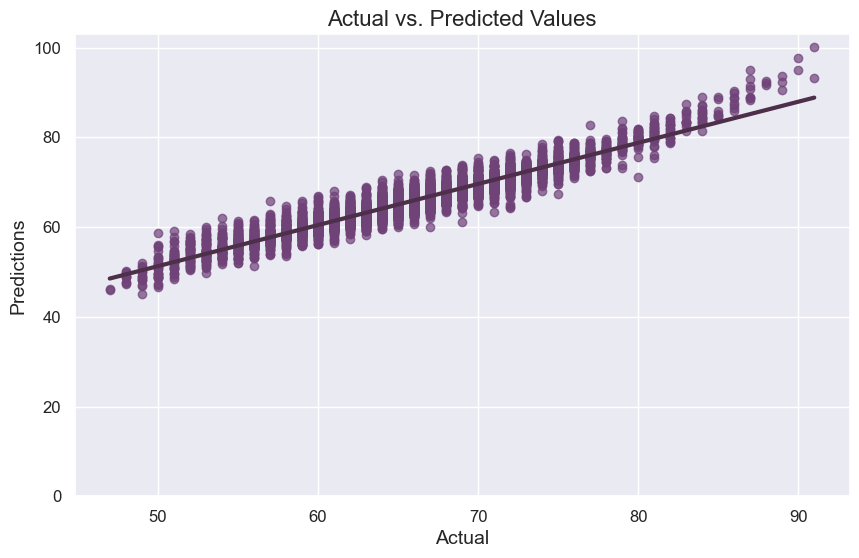

In [51]:
scatter_color = "#6f4278"
line_color = "#4d2f4a"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='predictions', data=comparison_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()